# Support Vector Machine Classifier (SVM) Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

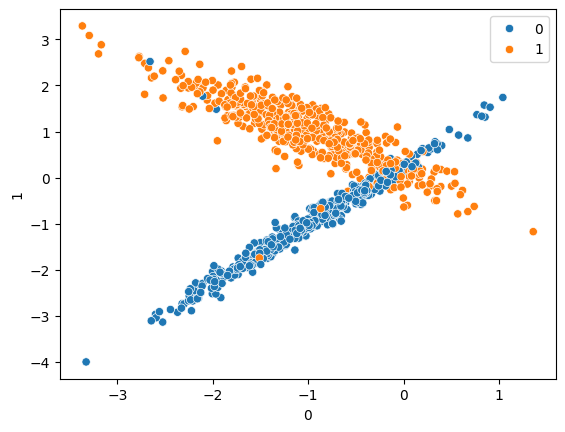

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [7]:
svc = SVC(kernel='linear')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [8]:
# Predictions 

y_pred = svc.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred), "\n")
print("Classification Report:", classification_report(y_test,y_pred))

Confusion Matrix:  [[110  21]
 [  6 113]] 

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.84      0.89       131
           1       0.84      0.95      0.89       119

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



In [19]:
# RBF

rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)

SVC()

In [32]:
y_pred_rbf = rbf.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_rbf), "\n")
print("Classification Report:", classification_report(y_test,y_pred_rbf))

Confusion Matrix:  [[113  18]
 [  4 115]] 

Classification Report:               precision    recall  f1-score   support

           0       0.97      0.86      0.91       131
           1       0.86      0.97      0.91       119

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



In [34]:
#polynomial

poly = SVC(kernel='poly')
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [38]:
y_pred_poly = poly.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_poly), "\n")
print("Classification Report:", classification_report(y_test,y_pred_poly))

Confusion Matrix:  [[ 88  43]
 [  2 117]] 

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.67      0.80       131
           1       0.73      0.98      0.84       119

    accuracy                           0.82       250
   macro avg       0.85      0.83      0.82       250
weighted avg       0.86      0.82      0.82       250



In [40]:
# sigmoid
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [45]:
y_pred_sigmoid = sigmoid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_sigmoid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_sigmoid))

Confusion Matrix:  [[103  28]
 [ 15 104]] 

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.79      0.83       131
           1       0.79      0.87      0.83       119

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



In [61]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
#defining parameter range
param_grid = {'C': [0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.0001],'kernel':['rbf','poly']}

In [63]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose= 3)

In [65]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.840 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [67]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
y_pred_grid = grid.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test,y_pred_grid), "\n")
print("Classification Report:", classification_report(y_test,y_pred_grid))

Confusion Matrix:  [[127   4]
 [  9 110]] 

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95       131
           1       0.96      0.92      0.94       119

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

